# K-Nearest Neighbors (K-NN) Classification

## Data Preprocessing

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier


# Set working directory
month_file = '6_October'
# Set working directory
os.chdir("/Users/mau/Library/CloudStorage/Dropbox/Mac/Documents/Dissertation/Chapter 2/Entire_Data/By month/"+month_file+"/Ending Balances/Per_Player")

## Top Players

In [2]:
# Filter Columns
filter = ['gender', 'age_gen', 'first_outcome',
        'first_wager','first_p/b', 'last_outcome', 'last_wager', 'last_p/b',
        'beginning_amt', 'ending_amt', 'ending_balance', 'ave_slotdenom', 
        'std_slotdenom', 'min_slotdenom', 'max_slotdenom', 'ave_theo_payback',
        'min_theo_payback', 'max_theo_payback', 'ave_wageramt', 'std_wageramt',
        'min_wager', 'max_wager', 'ave_p/b', 'std_p/b', 'max_p/b', 'max_profit', 'depletion_slope', 
        '#inc_slotdenom', '#dec_slotdenom', '#inc_maxbet', '#dec_maxbet', 
        '#W', '#L', '#NH', '#D', '#2ws', '#3ws', '#4ws',
        'w/min', 'l/min', '2ws/min', '3ws/min', '4ws/min',
        'nh/min', 'd/min', 'w/g', 'l/g', 'nh/g', 'd/g', 
        'ave_time_per_gamble', 'min_time_per_gamble', 'max_time_per_gamble',
        'machines_changes', 'unique_machines', 'ave_time_per_machine',
        'total_duration', 'total_gambles', 'continue_playing']

# Load dataset
dataset = pd.read_parquet('top_players_continuation_by_session.parquet', columns=filter)

# # Seperate dependent and independent variables
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Econde gender column (Binary)
le = LabelEncoder()

# Binary Encode gender
X[:, 0] = le.fit_transform(X[:, 0])

# # Encode age_generartion, first_outoce, last_outcome columns
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1, 2, 5])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

sc = StandardScaler()

# Scale all columns except the encoded ones
X_train[:, 14:] = sc.fit_transform(X_train[:, 14:])
X_test[:, 14:] = sc.transform(X_test[:, 14:])


classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred, average='macro'))
print('Recall: ', recall_score(y_test, y_pred, average='macro'))
print('F1 Score: ', f1_score(y_test, y_pred, average='macro'))

[[ 60  58]
 [ 60 129]]
Accuracy:  0.6156351791530945
Precision:  0.5949197860962567
Recall:  0.5955071294054345
F1 Score:  0.5951859467191132


### Which IDVs have the most weight in the model

In [3]:
# Create a dictionary mapping column names to their index positions
column_index_mapping = {index: column_name for index, column_name in enumerate(dataset.columns)}

# Print the dictionary
print(column_index_mapping)

{0: 'gender', 1: 'age_gen', 2: 'first_outcome', 3: 'first_wager', 4: 'first_p/b', 5: 'last_outcome', 6: 'last_wager', 7: 'last_p/b', 8: 'beginning_amt', 9: 'ending_amt', 10: 'ending_balance', 11: 'ave_slotdenom', 12: 'std_slotdenom', 13: 'min_slotdenom', 14: 'max_slotdenom', 15: 'ave_theo_payback', 16: 'min_theo_payback', 17: 'max_theo_payback', 18: 'ave_wageramt', 19: 'std_wageramt', 20: 'min_wager', 21: 'max_wager', 22: 'ave_p/b', 23: 'std_p/b', 24: 'max_p/b', 25: 'max_profit', 26: 'depletion_slope', 27: '#inc_slotdenom', 28: '#dec_slotdenom', 29: '#inc_maxbet', 30: '#dec_maxbet', 31: '#W', 32: '#L', 33: '#NH', 34: '#D', 35: '#2ws', 36: '#3ws', 37: '#4ws', 38: 'w/min', 39: 'l/min', 40: '2ws/min', 41: '3ws/min', 42: '4ws/min', 43: 'nh/min', 44: 'd/min', 45: 'w/g', 46: 'l/g', 47: 'nh/g', 48: 'd/g', 49: 'ave_time_per_gamble', 50: 'min_time_per_gamble', 51: 'max_time_per_gamble', 52: 'machines_changes', 53: 'unique_machines', 54: 'ave_time_per_machine', 55: 'total_duration', 56: 'total_g

In [4]:
from sklearn.inspection import permutation_importance

# Assuming you have a trained classifier named 'classifier' and encoded data named 'X_encoded'
# Calculate permutation importances
result = permutation_importance(classifier, X_train, y_train, n_repeats=10, random_state=42)

# Get feature importances and feature names
importances = result.importances_mean
feature_names = ct.get_feature_names_out()

# Sort feature importances
feature_importance = list(zip(feature_names, importances))
feature_importance.sort(key=lambda x: x[1], reverse=True)

# Print feature importances
for feature, importance in feature_importance:
    print(f"{feature}: {importance}")


remainder__x55: 0.03140293637846651
remainder__x51: 0.007340946166394724
remainder__x53: 0.005872756933115786
remainder__x4: 0.005872756933115763
remainder__x49: 0.0045676998368678005
remainder__x54: 0.00383360522022832
remainder__x14: 0.0033442088091353516
remainder__x6: 0.0029363784665578764
remainder__x21: 0.0026101141924958606
encoder__x2_draw: 0.002283849918433889
remainder__x18: 0.002202283849918385
encoder__x1_Silent: 0.0018760195758563913
remainder__x11: 0.0017944535073408986
remainder__x34: 0.0017128874388253946
encoder__x5_gain: 0.0013866231647634009
remainder__x52: 0.0012234910277324263
remainder__x12: 0.0010603588907014071
remainder__x13: 0.0008156606851549397
remainder__x3: 0.0007340946166394136
remainder__x20: 0.0007340946166394136
encoder__x1_Millenials: 0.0006525285481239429
remainder__x42: 0.0005709624796084278
remainder__x44: 0.0004078303425774421
encoder__x1_Gen Z: 0.0
remainder__x43: -8.156606851552616e-05
remainder__x39: -8.156606851554838e-05
remainder__x25: -0.00

## Cumulative Accuracy Profile (CAP) Graph

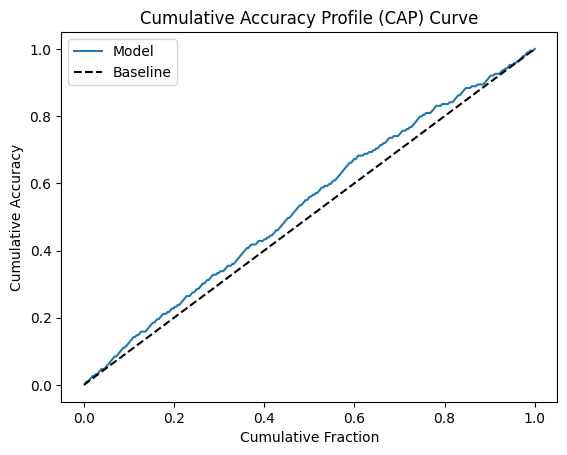

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have the predicted probabilities or scores named 'predicted_scores' and true labels named 'true_labels'

# Sort the scores and corresponding true labels
sorted_indices = np.argsort(y_pred)[::-1]
sorted_true_labels = y_test[sorted_indices]

# Calculate cumulative metrics
total_positive = np.sum(y_test)
cumulative_positives = np.cumsum(sorted_true_labels)
cumulative_accuracy = cumulative_positives / total_positive
cumulative_fraction = np.arange(1, len(sorted_true_labels) + 1) / len(sorted_true_labels)

# Create the CAP curve plot
plt.plot(cumulative_fraction, cumulative_accuracy, label='Model')
plt.plot([0, 1], [0, 1], 'k--', label='Baseline')
plt.xlabel('Cumulative Fraction')
plt.ylabel('Cumulative Accuracy')
plt.title('Cumulative Accuracy Profile (CAP) Curve')
plt.legend()
plt.show()

## Bottom Players

In [6]:
# Filter Columns
filter = ['gender', 'age_gen', 'first_outcome',
        'first_wager','first_p/b', 'last_outcome', 'last_wager', 'last_p/b',
        'beginning_amt', 'ending_amt', 'ending_balance', 'ave_slotdenom', 
        'std_slotdenom', 'min_slotdenom', 'max_slotdenom', 'ave_theo_payback',
        'min_theo_payback', 'max_theo_payback', 'ave_wageramt', 'std_wageramt',
        'min_wager', 'max_wager', 'ave_p/b', 'std_p/b', 'max_p/b', 'max_profit', 'depletion_slope', 
        '#inc_slotdenom', '#dec_slotdenom', '#inc_maxbet', '#dec_maxbet', 
        '#W', '#L', '#NH', '#D', '#2ws', '#3ws', '#4ws',
        'w/min', 'l/min', '2ws/min', '3ws/min', '4ws/min',
        'nh/min', 'd/min', 'w/g', 'l/g', 'nh/g', 'd/g', 
        'ave_time_per_gamble', 'min_time_per_gamble', 'max_time_per_gamble',
        'machines_changes', 'unique_machines', 'ave_time_per_machine',
        'total_duration', 'total_gambles', 'continue_playing']

# Load dataset
dataset = pd.read_parquet('ntop_players_continuation_by_session.parquet', columns=filter)

# # Seperate dependent and independent variables
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Econde gender column (Binary)
le = LabelEncoder()

# Binary Encode gender
X[:, 0] = le.fit_transform(X[:, 0])

# # Encode age_generartion, first_outoce, last_outcome columns
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1, 2, 5])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

sc = StandardScaler()

# Scale all columns except the encoded ones
X_train[:, 14:] = sc.fit_transform(X_train[:, 14:])
X_test[:, 14:] = sc.transform(X_test[:, 14:])


classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred, average='macro'))
print('Recall: ', recall_score(y_test, y_pred, average='macro'))
print('F1 Score: ', f1_score(y_test, y_pred, average='macro'))

[[897  88]
 [275  66]]
Accuracy:  0.7262443438914027
Precision:  0.5969648951730863
Recall:  0.5521041427869657
F1 Score:  0.5491886879925822


In [7]:
# Create a dictionary mapping column names to their index positions
column_index_mapping = {index: column_name for index, column_name in enumerate(dataset.columns)}

# Print the dictionary
print(column_index_mapping)

{0: 'gender', 1: 'age_gen', 2: 'first_outcome', 3: 'first_wager', 4: 'first_p/b', 5: 'last_outcome', 6: 'last_wager', 7: 'last_p/b', 8: 'beginning_amt', 9: 'ending_amt', 10: 'ending_balance', 11: 'ave_slotdenom', 12: 'std_slotdenom', 13: 'min_slotdenom', 14: 'max_slotdenom', 15: 'ave_theo_payback', 16: 'min_theo_payback', 17: 'max_theo_payback', 18: 'ave_wageramt', 19: 'std_wageramt', 20: 'min_wager', 21: 'max_wager', 22: 'ave_p/b', 23: 'std_p/b', 24: 'max_p/b', 25: 'max_profit', 26: 'depletion_slope', 27: '#inc_slotdenom', 28: '#dec_slotdenom', 29: '#inc_maxbet', 30: '#dec_maxbet', 31: '#W', 32: '#L', 33: '#NH', 34: '#D', 35: '#2ws', 36: '#3ws', 37: '#4ws', 38: 'w/min', 39: 'l/min', 40: '2ws/min', 41: '3ws/min', 42: '4ws/min', 43: 'nh/min', 44: 'd/min', 45: 'w/g', 46: 'l/g', 47: 'nh/g', 48: 'd/g', 49: 'ave_time_per_gamble', 50: 'min_time_per_gamble', 51: 'max_time_per_gamble', 52: 'machines_changes', 53: 'unique_machines', 54: 'ave_time_per_machine', 55: 'total_duration', 56: 'total_g

In [8]:
from sklearn.inspection import permutation_importance

# Assuming you have a trained classifier named 'classifier' and encoded data named 'X_encoded'
# Calculate permutation importances
result = permutation_importance(classifier, X_train, y_train, n_repeats=10, random_state=42)

# Get feature importances and feature names
importances = result.importances_mean
feature_names = ct.get_feature_names_out()

# Sort feature importances
feature_importance = list(zip(feature_names, importances))
feature_importance.sort(key=lambda x: x[1], reverse=True)

# Print feature importances
for feature, importance in feature_importance:
    print(f"{feature}: {importance}")


remainder__x55: 0.02121040723981893
remainder__x51: 0.014347662141779738
remainder__x54: 0.006391402714932104
remainder__x53: 0.0052224736048265274
remainder__x56: 0.003299396681749611
remainder__x32: 0.0029977375565610753
remainder__x35: 0.0013951734539969674
remainder__x8: 0.0013574660633484115
remainder__x37: 0.001263197586726994
encoder__x5_near-hit: 0.001150075414781293
remainder__x25: 0.0010180995475113086
remainder__x33: 0.0010180995475113086
remainder__x12: 0.000999245852187025
remainder__x21: 0.0009615384615384581
remainder__x50: 0.0009426847662141746
remainder__x28: 0.0006410256410256387
remainder__x52: 0.0005090497737556543
remainder__x14: 0.0004713423831070873
encoder__x2_gain: 0.00037707390648566985
encoder__x1_Silent: 0.00035822021116138636
remainder__x42: 0.0003016591251885359
remainder__x49: 0.0003016591251885359
remainder__x11: 0.00018853695324283493
remainder__x27: 0.00016968325791855143
remainder__x34: 0.00016968325791854032
remainder__x46: 3.770739064853368e-05
enco

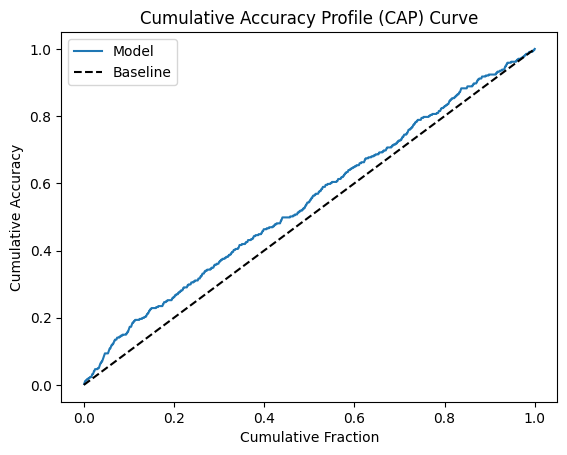

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have the predicted probabilities or scores named 'predicted_scores' and true labels named 'true_labels'

# Sort the scores and corresponding true labels
sorted_indices = np.argsort(y_pred)[::-1]
sorted_true_labels = y_test[sorted_indices]

# Calculate cumulative metrics
total_positive = np.sum(y_test)
cumulative_positives = np.cumsum(sorted_true_labels)
cumulative_accuracy = cumulative_positives / total_positive
cumulative_fraction = np.arange(1, len(sorted_true_labels) + 1) / len(sorted_true_labels)

# Create the CAP curve plot
plt.plot(cumulative_fraction, cumulative_accuracy, label='Model')
plt.plot([0, 1], [0, 1], 'k--', label='Baseline')
plt.xlabel('Cumulative Fraction')
plt.ylabel('Cumulative Accuracy')
plt.title('Cumulative Accuracy Profile (CAP) Curve')
plt.legend()
plt.show()